## Categorical challenge

Can you find more cat in your dat?

We loved the participation and engagement with the first Cat in the Dat competition.

Because this is such a common task and important skill to master, we've put together a dataset that contains only categorical features, and includes:

binary features
low- and high-cardinality nominal features
low- and high-cardinality ordinal features
(potentially) cyclical features
This follow-up competition offers an even more challenging dataset so that you can continue to build your skills with the common machine learning task of encoding categorical variables. This challenge adds the additional complexity of feature interactions, as well as missing data.

This Playground competition will give you the opportunity to try different encoding schemes for different algorithms to compare how they perform. We encourage you to share what you find with the community.

If you're not sure how to get started, you can check out the Categorical Variables section of Kaggle's Intermediate Machine Learning course.


Have Fun!

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
train = pd.read_csv('../ML-projects/Categorical_challenge/train.csv')
test = pd.read_csv('../ML-projects/Categorical_challenge/test.csv')
sample_submission = pd.read_csv('../ML-projects/Categorical_challenge/sample_submission.csv')

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
id        600000 non-null int64
bin_0     582106 non-null float64
bin_1     581997 non-null float64
bin_2     582070 non-null float64
bin_3     581986 non-null object
bin_4     581953 non-null object
nom_0     581748 non-null object
nom_1     581844 non-null object
nom_2     581965 non-null object
nom_3     581879 non-null object
nom_4     581965 non-null object
nom_5     582222 non-null object
nom_6     581869 non-null object
nom_7     581997 non-null object
nom_8     582245 non-null object
nom_9     581927 non-null object
ord_0     581712 non-null float64
ord_1     581959 non-null object
ord_2     581925 non-null object
ord_3     582084 non-null object
ord_4     582070 non-null object
ord_5     582287 non-null object
day       582048 non-null float64
month     582012 non-null float64
target    600000 non-null int64
dtypes: float64(6), int64(2), object(17)
memory usage: 114.4

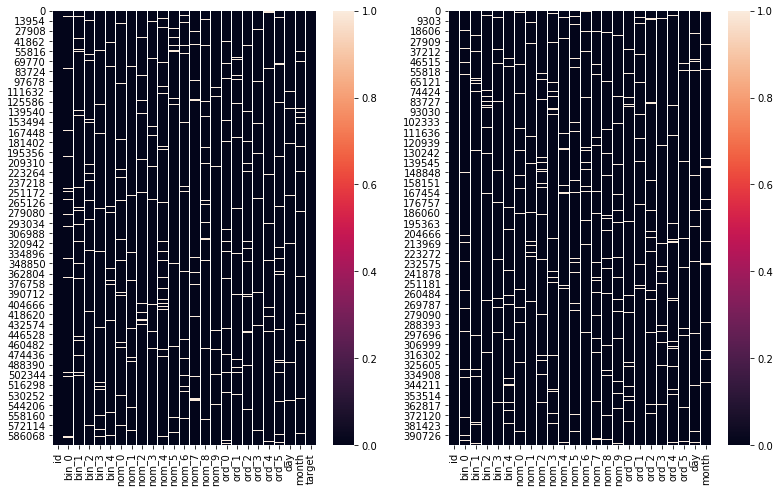

In [33]:
fr,ax = plt.subplots(1,2,figsize = (13,8))
sns.heatmap(train.isna(),ax = ax[0])
sns.heatmap(test.isna(),ax = ax[1])

In [34]:
train_clean = train.dropna(axis = 0,how = 'any')
test_clean = test.dropna(axis = 0 , how = 'any')

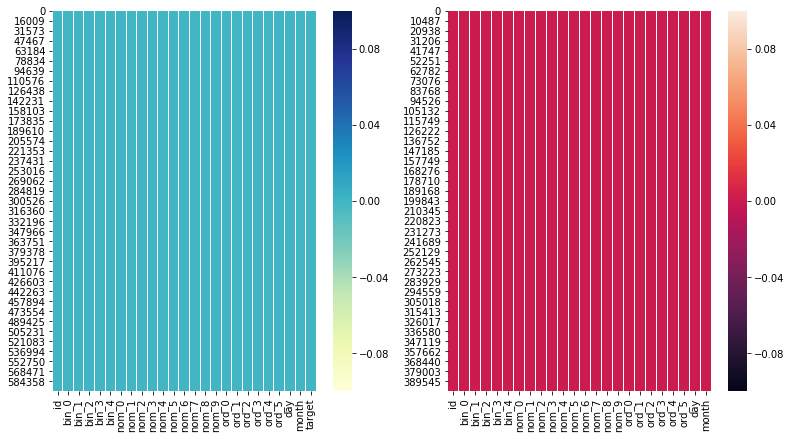

In [37]:
fr,ax = plt.subplots(1,2,figsize = (13,7))
sns.heatmap(train_clean.isna(),ax = ax[0],cmap="YlGnBu")
sns.heatmap(test_clean.isna(),ax = ax[1])

In [39]:
train_clean.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
10,10,0.0,0.0,1.0,T,Y,Blue,Triangle,Hamster,Finland,...,9bfe3ee22,1.0,Novice,Hot,b,O,hG,7.0,5.0,1
11,11,0.0,0.0,1.0,F,Y,Red,Square,Hamster,Costa Rica,...,6c73b62e4,1.0,Contributor,Hot,b,M,xF,2.0,8.0,0


In [46]:
train_clean['nom_0'].unique().shape

(3,)

In [94]:
for i in train_clean.loc[:,'nom_0':'nom_9']:
    unique = train_clean[i].unique().shape[0]
    print("The unique of {} is {}".format(i,unique))

The unique of nom_0 is 3
The unique of nom_1 is 6
The unique of nom_2 is 6
The unique of nom_3 is 6
The unique of nom_4 is 4
The unique of nom_5 is 1219
The unique of nom_6 is 1519
The unique of nom_7 is 222
The unique of nom_8 is 222
The unique of nom_9 is 2217


In [61]:
train.loc[:,'nom_0':'nom_9'].columns

Index(['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7',
       'nom_8', 'nom_9'],
      dtype='object')

In [69]:
pd.value_counts(train_clean['nom_1'])

Triangle     84094
Polygon      77975
Trapezoid    61184
Circle       53957
Square       13603
Star          7229
Name: nom_1, dtype: int64

In [95]:
train_clean['nom_2'].unique()

array(['Hamster', 'Axolotl', 'Lion', 'Dog', 'Cat', 'Snake'], dtype=object)

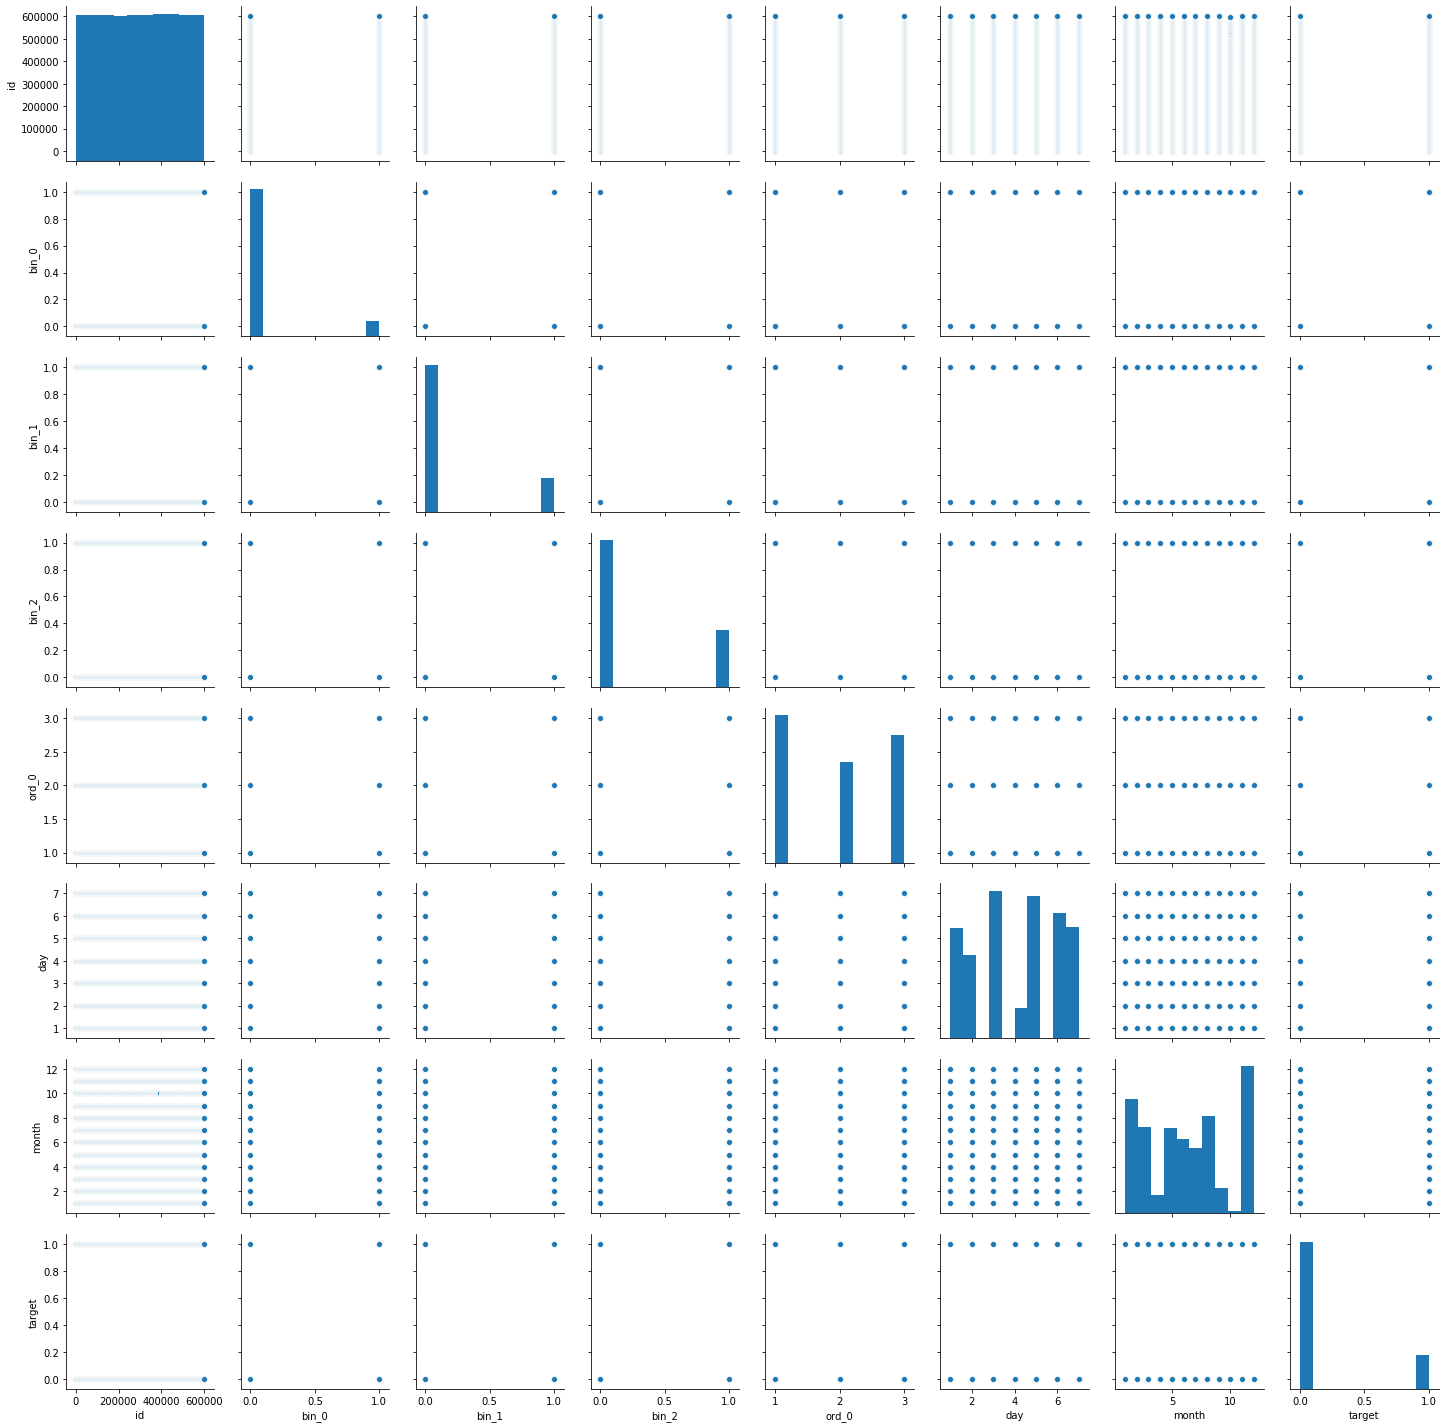

In [96]:
sns.pairplot(train_clean)